## Importing Relevant Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

## Data Inspection

In [2]:
train_data=pd.read_csv('TRAIN.csv')
test_data=pd.read_csv('TEST_FINAL.csv')


In [3]:
train_data.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [4]:
test_data.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount
0,T1188341,171,S4,L2,R3,2019-06-01,0,No
1,T1188342,172,S1,L1,R1,2019-06-01,0,No
2,T1188343,173,S4,L2,R1,2019-06-01,0,No
3,T1188344,174,S1,L1,R4,2019-06-01,0,No
4,T1188345,170,S1,L1,R2,2019-06-01,0,No


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
ID               188340 non-null object
Store_id         188340 non-null int64
Store_Type       188340 non-null object
Location_Type    188340 non-null object
Region_Code      188340 non-null object
Date             188340 non-null object
Holiday          188340 non-null int64
Discount         188340 non-null object
#Order           188340 non-null int64
Sales            188340 non-null float64
dtypes: float64(1), int64(3), object(6)
memory usage: 14.4+ MB


In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22265 entries, 0 to 22264
Data columns (total 8 columns):
ID               22265 non-null object
Store_id         22265 non-null int64
Store_Type       22265 non-null object
Location_Type    22265 non-null object
Region_Code      22265 non-null object
Date             22265 non-null object
Holiday          22265 non-null int64
Discount         22265 non-null object
dtypes: int64(2), object(6)
memory usage: 1.4+ MB


In [7]:
train_data.shape,test_data.shape

((188340, 10), (22265, 8))

## Check for Missing values

In [8]:
train_data.isnull().sum()

ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
#Order           0
Sales            0
dtype: int64

In [9]:
test_data.isnull().sum()

ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
dtype: int64

In [10]:
train_data.dtypes

ID                object
Store_id           int64
Store_Type        object
Location_Type     object
Region_Code       object
Date              object
Holiday            int64
Discount          object
#Order             int64
Sales            float64
dtype: object

In [11]:
test_data.dtypes

ID               object
Store_id          int64
Store_Type       object
Location_Type    object
Region_Code      object
Date             object
Holiday           int64
Discount         object
dtype: object

# Handling Data Column

In [12]:
# Converting  object dtype to datetime dtype for Date Column.

def convert(df,col):
    df[col]=pd.to_datetime(df[col])

In [13]:
convert(train_data,'Date')
convert(test_data,'Date')

In [14]:
train_data.dtypes

ID                       object
Store_id                  int64
Store_Type               object
Location_Type            object
Region_Code              object
Date             datetime64[ns]
Holiday                   int64
Discount                 object
#Order                    int64
Sales                   float64
dtype: object

In [15]:
test_data.dtypes

ID                       object
Store_id                  int64
Store_Type               object
Location_Type            object
Region_Code              object
Date             datetime64[ns]
Holiday                   int64
Discount                 object
dtype: object

In [16]:
train_data['Day']=train_data['Date'].dt.day
train_data['Month']=train_data['Date'].dt.month
train_data['Year']=train_data['Date'].dt.year

In [17]:
test_data['Day']=test_data['Date'].dt.day
test_data['Month']=test_data['Date'].dt.month
test_data['Year']=test_data['Date'].dt.year

In [18]:
train_data.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales,Day,Month,Year
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84,1,1,2018
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12,1,1,2018
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20,1,1,2018
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16,1,1,2018
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52,1,1,2018


In [19]:
test_data.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,Day,Month,Year
0,T1188341,171,S4,L2,R3,2019-06-01,0,No,1,6,2019
1,T1188342,172,S1,L1,R1,2019-06-01,0,No,1,6,2019
2,T1188343,173,S4,L2,R1,2019-06-01,0,No,1,6,2019
3,T1188344,174,S1,L1,R4,2019-06-01,0,No,1,6,2019
4,T1188345,170,S1,L1,R2,2019-06-01,0,No,1,6,2019


In [20]:
def drop(df,col):
    df.drop(col, axis=1, inplace=True)

In [21]:
drop(train_data,'ID')
drop(train_data,'Store_id')
drop(train_data,'Date')

In [22]:
drop(test_data,'ID')
drop(test_data,'Store_id')
drop(test_data,'Date')

In [23]:
train_data.head(10)

,Store_Type,Location_Type,Region_Code,Holiday,Discount,#Order,Sales,Day,Month,Year
0,S1,L3,R1,1,Yes,9,7011.84,1,1,2018
1,S4,L2,R1,1,Yes,60,51789.12,1,1,2018
2,S3,L2,R1,1,Yes,42,36868.20,1,1,2018
3,S2,L3,R1,1,Yes,23,19715.16,1,1,2018
4,S2,L3,R4,1,Yes,62,45614.52,1,1,2018
5,S1,L3,R2,1,Yes,39,34211.22,1,1,2018
6,S1,L1,R2,1,Yes,40,35352.66,1,1,2018
7,S1,L1,R3,1,Yes,64,52650.00,1,1,2018
8,S3,L1,R3,1,Yes,62,42633.78,1,1,2018
9,S4,L1,R1,1,Yes,87,62572.80,1,1,2018


In [24]:
test_data.head(10)

,Store_Type,Location_Type,Region_Code,Holiday,Discount,Day,Month,Year
0,S4,L2,R3,0,No,1,6,2019
1,S1,L1,R1,0,No,1,6,2019
2,S4,L2,R1,0,No,1,6,2019
3,S1,L1,R4,0,No,1,6,2019
4,S1,L1,R2,0,No,1,6,2019
5,S4,L2,R1,0,No,1,6,2019
6,S4,L2,R3,0,No,1,6,2019
7,S1,L2,R4,0,No,1,6,2019
8,S3,L2,R4,0,No,1,6,2019
9,S2,L1,R4,0,No,1,6,2019


In [25]:
cat_col=[col for col in train_data.columns if train_data[col].dtype=='object']
cat_col_1=[col for col in test_data.columns if test_data[col].dtype=='object']


In [26]:
cont_col=[col for col in train_data.columns if train_data[col].dtype!='object']
cont_col_1=[col for col in test_data.columns if test_data[col].dtype!='object']

In [27]:
cat_col_1

['Store_Type', 'Location_Type', 'Region_Code', 'Discount']

In [28]:
train_data['Discount'].value_counts()

No     104051
Yes     84289
Name: Discount, dtype: int64

# Visualising our data

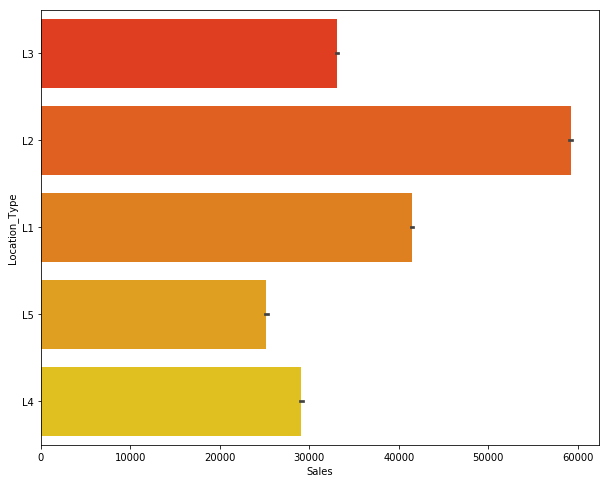

In [29]:
plt.figure(figsize=(10,8))
sns.barplot(y='Location_Type',x='Sales',data=train_data,palette='autumn')

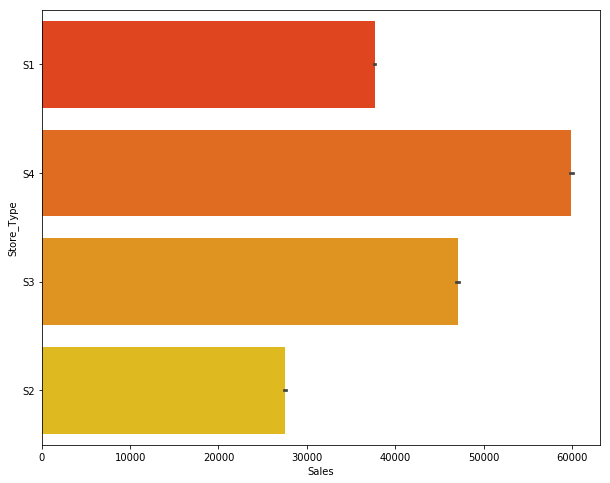

In [30]:
plt.figure(figsize=(10,8))
sns.barplot(y='Store_Type',x='Sales',data=train_data,palette='autumn')

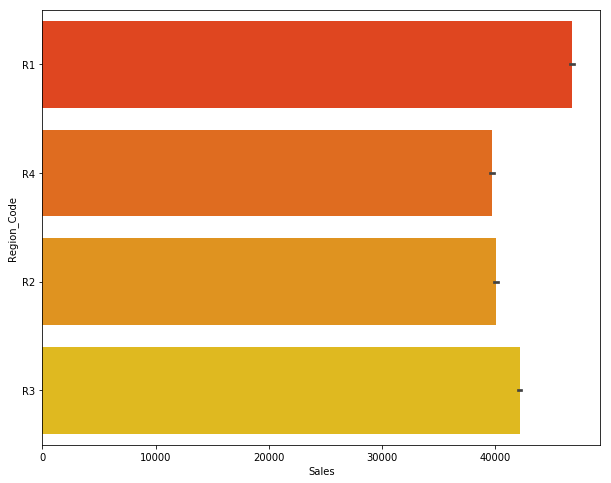

In [31]:
plt.figure(figsize=(10,8))
sns.barplot(y='Region_Code',x='Sales',data=train_data,palette='autumn')

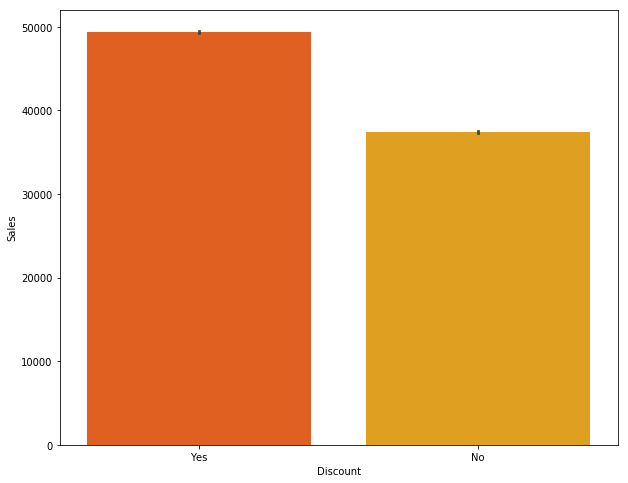

In [32]:
plt.figure(figsize=(10,8))
sns.barplot(y='Sales',x='Discount',data=train_data,palette='autumn')

1.Loacation type of L2 gives hishest sale compare to other Location types.<br>
2.Store Type of S4 gives hishest sale compare to other store types.<br>
3.WOMart stores that are present in Region R1 gives hishest sale compare to other stores.<br>
4.We see more sales if we give discount to customers.<br>

In [34]:
train_data.corr()

,Holiday,#Order,Sales,Day,Month,Year
Holiday,1.000000,-0.140496,-0.154779,0.013668,0.013705,0.013862
#Order,-0.140496,1.000000,0.941601,-0.017951,-0.002864,0.022860
Sales,-0.154779,0.941601,1.000000,-0.038969,-0.018092,0.018284
Day,0.013668,-0.017951,-0.038969,1.000000,0.012734,-0.005078
Month,0.013705,-0.002864,-0.018092,0.012734,1.000000,-0.470142
Year,0.013862,0.022860,0.018284,-0.005078,-0.470142,1.000000


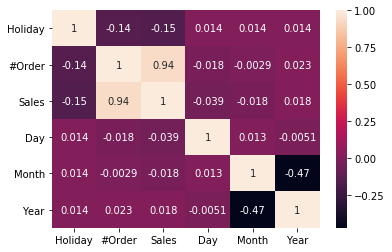

In [35]:
sns.heatmap(train_data.corr(),annot=True)
plt.show()

It seems its not good idea to drop the order column because Order column and sales are highly co- related to each other

## Handling Categorical Data

In [36]:
categorical=train_data[cat_col]
categorical.head()

,Store_Type,Location_Type,Region_Code,Discount
0,S1,L3,R1,Yes
1,S4,L2,R1,Yes
2,S3,L2,R1,Yes
3,S2,L3,R1,Yes
4,S2,L3,R4,Yes


In [37]:
categorical_1=test_data[cat_col_1]
categorical_1.head()

,Store_Type,Location_Type,Region_Code,Discount
0,S4,L2,R3,No
1,S1,L1,R1,No
2,S4,L2,R1,No
3,S1,L1,R4,No
4,S1,L1,R2,No


In [38]:
Store=pd.get_dummies(categorical['Store_Type'], drop_first=True)
Location=pd.get_dummies(categorical['Location_Type'], drop_first=True)
Region=pd.get_dummies(categorical['Region_Code'], drop_first=True)


In [39]:
Store_1=pd.get_dummies(categorical_1['Store_Type'], drop_first=True)
Location_1=pd.get_dummies(categorical_1['Location_Type'], drop_first=True)
Region_1=pd.get_dummies(categorical_1['Region_Code'], drop_first=True)

In [40]:
Store.head()

,S2,S3,S4
0,0,0,0
1,0,0,1
2,0,1,0
3,1,0,0
4,1,0,0


In [41]:
Store_1.head()

,S2,S3,S4
0,0,0,1
1,0,0,0
2,0,0,1
3,0,0,0
4,0,0,0


In [42]:
categorical['Discount'].unique()

array(['Yes', 'No'], dtype=object)

In [43]:
dic={'Yes':1, 'No':0}

In [44]:
categorical['Discount']=categorical['Discount'].map(dic)

In [45]:
categorical_1['Discount']=categorical_1['Discount'].map(dic)

In [46]:
categorical.head()

,Store_Type,Location_Type,Region_Code,Discount
0,S1,L3,R1,1
1,S4,L2,R1,1
2,S3,L2,R1,1
3,S2,L3,R1,1
4,S2,L3,R4,1


In [47]:
# Concatenate dataframes
data_train=pd.concat([categorical,Store,Location,Region,train_data[cont_col]],axis=1)
data_test=pd.concat([categorical_1,Store_1,Location_1,Region_1,test_data[cont_col_1]],axis=1)

In [48]:
data_train.head(10)

,Store_Type,Location_Type,Region_Code,Discount,S2,S3,S4,L2,L3,L4,L5,R2,R3,R4,Holiday,#Order,Sales,Day,Month,Year
0,S1,L3,R1,1,0,0,0,0,1,0,0,0,0,0,1,9,7011.84,1,1,2018
1,S4,L2,R1,1,0,0,1,1,0,0,0,0,0,0,1,60,51789.12,1,1,2018
2,S3,L2,R1,1,0,1,0,1,0,0,0,0,0,0,1,42,36868.20,1,1,2018
3,S2,L3,R1,1,1,0,0,0,1,0,0,0,0,0,1,23,19715.16,1,1,2018
4,S2,L3,R4,1,1,0,0,0,1,0,0,0,0,1,1,62,45614.52,1,1,2018
5,S1,L3,R2,1,0,0,0,0,1,0,0,1,0,0,1,39,34211.22,1,1,2018
6,S1,L1,R2,1,0,0,0,0,0,0,0,1,0,0,1,40,35352.66,1,1,2018
7,S1,L1,R3,1,0,0,0,0,0,0,0,0,1,0,1,64,52650.00,1,1,2018
8,S3,L1,R3,1,0,1,0,0,0,0,0,0,1,0,1,62,42633.78,1,1,2018
9,S4,L1,R1,1,0,0,1,0,0,0,0,0,0,0,1,87,62572.80,1,1,2018


In [49]:
data_test.head(10)

,Store_Type,Location_Type,Region_Code,Discount,S2,S3,S4,L2,L3,L4,L5,R2,R3,R4,Holiday,Day,Month,Year
0,S4,L2,R3,0,0,0,1,1,0,0,0,0,1,0,0,1,6,2019
1,S1,L1,R1,0,0,0,0,0,0,0,0,0,0,0,0,1,6,2019
2,S4,L2,R1,0,0,0,1,1,0,0,0,0,0,0,0,1,6,2019
3,S1,L1,R4,0,0,0,0,0,0,0,0,0,0,1,0,1,6,2019
4,S1,L1,R2,0,0,0,0,0,0,0,0,1,0,0,0,1,6,2019
5,S4,L2,R1,0,0,0,1,1,0,0,0,0,0,0,0,1,6,2019
6,S4,L2,R3,0,0,0,1,1,0,0,0,0,1,0,0,1,6,2019
7,S1,L2,R4,0,0,0,0,1,0,0,0,0,0,1,0,1,6,2019
8,S3,L2,R4,0,0,1,0,1,0,0,0,0,0,1,0,1,6,2019
9,S2,L1,R4,0,1,0,0,0,0,0,0,0,0,1,0,1,6,2019


In [50]:
drop(data_train,'Store_Type')
drop(data_train,'Location_Type')
drop(data_train,'Region_Code')

In [51]:
drop(data_test,'Store_Type')
drop(data_test,'Location_Type')
drop(data_test,'Region_Code')

In [52]:
data_train.head(10)

,Discount,S2,S3,S4,L2,L3,L4,L5,R2,R3,R4,Holiday,#Order,Sales,Day,Month,Year
0,1,0,0,0,0,1,0,0,0,0,0,1,9,7011.84,1,1,2018
1,1,0,0,1,1,0,0,0,0,0,0,1,60,51789.12,1,1,2018
2,1,0,1,0,1,0,0,0,0,0,0,1,42,36868.20,1,1,2018
3,1,1,0,0,0,1,0,0,0,0,0,1,23,19715.16,1,1,2018
4,1,1,0,0,0,1,0,0,0,0,1,1,62,45614.52,1,1,2018
5,1,0,0,0,0,1,0,0,1,0,0,1,39,34211.22,1,1,2018
6,1,0,0,0,0,0,0,0,1,0,0,1,40,35352.66,1,1,2018
7,1,0,0,0,0,0,0,0,0,1,0,1,64,52650.00,1,1,2018
8,1,0,1,0,0,0,0,0,0,1,0,1,62,42633.78,1,1,2018
9,1,0,0,1,0,0,0,0,0,0,0,1,87,62572.80,1,1,2018


In [53]:
data_test.head(10)

,Discount,S2,S3,S4,L2,L3,L4,L5,R2,R3,R4,Holiday,Day,Month,Year
0,0,0,0,1,1,0,0,0,0,1,0,0,1,6,2019
1,0,0,0,0,0,0,0,0,0,0,0,0,1,6,2019
2,0,0,0,1,1,0,0,0,0,0,0,0,1,6,2019
3,0,0,0,0,0,0,0,0,0,0,1,0,1,6,2019
4,0,0,0,0,0,0,0,0,1,0,0,0,1,6,2019
5,0,0,0,1,1,0,0,0,0,0,0,0,1,6,2019
6,0,0,0,1,1,0,0,0,0,1,0,0,1,6,2019
7,0,0,0,0,1,0,0,0,0,0,1,0,1,6,2019
8,0,0,1,0,1,0,0,0,0,0,1,0,1,6,2019
9,0,1,0,0,0,0,0,0,0,0,1,0,1,6,2019


In [74]:
def plot(df,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2)

<Figure size 2160x1440 with 0 Axes>

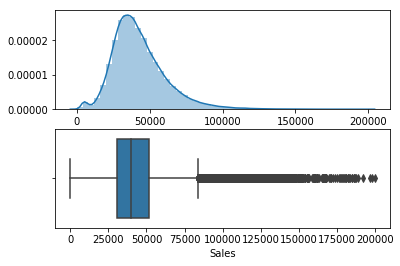

In [75]:
plt.figure(figsize=(30,20))
plot(data_train,'Sales')

In [72]:
data_train['Sales']=np.where(data_train['Sales']>=200000,data_train['Sales'].median(),data_train['Sales'])

<Figure size 2160x1440 with 0 Axes>

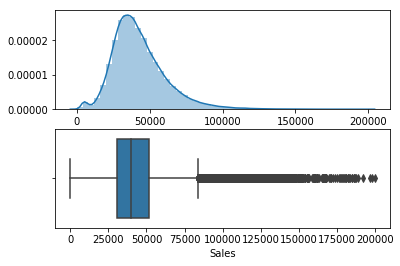

In [76]:
plt.figure(figsize=(30,20))
plot(data_train,'Sales')

# Finding Order column in Test Set 

In [77]:
data_train.columns

Index(['Discount', 'S2', 'S3', 'S4', 'L2', 'L3', 'L4', 'L5', 'R2', 'R3', 'R4',
       'Holiday', '#Order', 'Sales', 'Day', 'Month', 'Year'],
      dtype='object')

In [92]:
columns = ['Discount', 'S2', 'S3', 'S4', 'L2', 'L3', 'L4', 'L5', 'R2', 'R3', 'R4',
       'Holiday', 'Day', 'Month', 'Year']

In [93]:
#Features columns for predicting order
ord_train = data_train[columns]


In [94]:
#Target columns for order
ord_target = data_train['#Order']


In [95]:
#Initialising....
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [97]:
reg.fit(ord_train,ord_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [98]:
#Predicting order 
y_pred = reg.predict(data_test)

In [99]:
y_pred

array([ 98.64849565,  59.11353126, 104.63635863, ...,  67.95570494,
        53.22935516,  42.71149219])

In [100]:
#Converting it into integer as order cannot be float value 
y_pred = [int(i) for i in y_pred]

In [102]:
y_pred

[98,
 59,
 104,
 52,
 55,
 104,
 98,
 63,
 74,
 39,
 74,
 55,
 53,
 64,
 70,
 57,
 66,
 34,
 59,
 80,
 37,
 68,
 70,
 37,
 68,
 53,
 55,
 39,
 55,
 93,
 55,
 74,
 51,
 57,
 104,
 98,
 57,
 55,
 40,
 104,
 53,
 55,
 45,
 53,
 66,
 53,
 104,
 101,
 39,
 119,
 53,
 90,
 104,
 63,
 53,
 104,
 53,
 64,
 55,
 66,
 59,
 31,
 104,
 59,
 55,
 33,
 98,
 52,
 65,
 36,
 98,
 34,
 53,
 37,
 55,
 64,
 74,
 52,
 93,
 101,
 31,
 90,
 101,
 53,
 55,
 53,
 101,
 55,
 104,
 93,
 53,
 38,
 98,
 52,
 42,
 93,
 101,
 36,
 87,
 55,
 53,
 59,
 53,
 70,
 59,
 51,
 104,
 98,
 55,
 52,
 80,
 38,
 93,
 53,
 104,
 34,
 37,
 59,
 104,
 31,
 63,
 55,
 32,
 93,
 59,
 57,
 47,
 52,
 53,
 38,
 55,
 66,
 66,
 66,
 38,
 63,
 52,
 53,
 38,
 63,
 74,
 66,
 74,
 74,
 37,
 32,
 62,
 53,
 55,
 74,
 53,
 51,
 53,
 74,
 49,
 66,
 47,
 55,
 55,
 98,
 57,
 55,
 50,
 51,
 53,
 93,
 52,
 55,
 47,
 55,
 53,
 70,
 42,
 52,
 101,
 55,
 90,
 52,
 93,
 31,
 80,
 53,
 37,
 63,
 104,
 37,
 53,
 39,
 93,
 53,
 77,
 52,
 55,
 55,
 98,
 104,

In [103]:
data_test.head(5)

,Discount,S2,S3,S4,L2,L3,L4,L5,R2,R3,R4,Holiday,Day,Month,Year
0,0,0,0,1,1,0,0,0,0,1,0,0,1,6,2019
1,0,0,0,0,0,0,0,0,0,0,0,0,1,6,2019
2,0,0,0,1,1,0,0,0,0,0,0,0,1,6,2019
3,0,0,0,0,0,0,0,0,0,0,1,0,1,6,2019
4,0,0,0,0,0,0,0,0,1,0,0,0,1,6,2019


In [104]:
#Merging into the test data ...
data_test.insert(3,'#Order' ,y_pred)

In [105]:
data_test.head(5)

,Discount,S2,S3,#Order,S4,L2,L3,L4,L5,R2,R3,R4,Holiday,Day,Month,Year
0,0,0,0,98,1,1,0,0,0,0,1,0,0,1,6,2019
1,0,0,0,59,0,0,0,0,0,0,0,0,0,1,6,2019
2,0,0,0,104,1,1,0,0,0,0,0,0,0,1,6,2019
3,0,0,0,52,0,0,0,0,0,0,0,1,0,1,6,2019
4,0,0,0,55,0,0,0,0,0,1,0,0,0,1,6,2019


## Separate  Independent & Dependent Data

In [106]:
X=data_train.drop('Sales',axis=1)
X.head()

,Discount,S2,S3,S4,L2,L3,L4,L5,R2,R3,R4,Holiday,#Order,Day,Month,Year
0,1,0,0,0,0,1,0,0,0,0,0,1,9,1,1,2018
1,1,0,0,1,1,0,0,0,0,0,0,1,60,1,1,2018
2,1,0,1,0,1,0,0,0,0,0,0,1,42,1,1,2018
3,1,1,0,0,0,1,0,0,0,0,0,1,23,1,1,2018
4,1,1,0,0,0,1,0,0,0,0,1,1,62,1,1,2018


In [107]:
y=data_train['Sales']
y

0           7011.84
1          51789.12
2          36868.20
3          19715.16
4          45614.52
5          34211.22
6          35352.66
7          52650.00
8          42633.78
9          62572.80
10         27468.21
11         57590.40
12         45563.25
13         47322.90
14         42889.89
15         44319.33
16         29781.84
17         26906.61
18         44858.67
19         39193.20
20         32486.76
21         47317.14
22         69937.98
23         31509.72
24         33665.10
25         32686.08
26         25696.50
27         40115.70
28         57487.56
29         68205.15
            ...    
188310     40573.17
188311     74268.00
188312     39291.00
188313     43006.89
188314     67702.32
188315     49405.98
188316     23683.50
188317     43093.44
188318     44764.53
188319     30850.80
188320    110414.28
188321     87785.70
188322     32127.00
188323     70717.05
188324     69593.04
188325     63774.00
188326     33989.76
188327     39546.00
188328     40305.00


In [114]:
from sklearn.model_selection import train_test_split

In [115]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [116]:
from sklearn.metrics import mean_squared_log_error

### Function that is been used to test various regression models like Linear Regression, Decision Tree Regression,Random Forest Regression.

In [117]:


from sklearn import metrics

def predict(ml_model):
    model=ml_model.fit(X_train,y_train)
    print('Training score : {}'.format(model.score(X_train,y_train)))
    y_prediction=model.predict(X_test)
    print('predictions are: \n {}'.format(y_prediction))
    print('\n')
    r2_score=metrics.r2_score(y_test,y_prediction)
    print('r2 score: {}'.format(r2_score))
    print('MAE:',metrics.mean_absolute_error(y_test,y_prediction))
    print('MSE:',metrics.mean_squared_error(y_test,y_prediction))
    print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
    print('MSLE',mean_squared_log_error(y_test, y_prediction, multioutput='raw_values'))
    

In [118]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

## Decision Tree Regressor

In [120]:
predict(DecisionTreeRegressor())

Training score : 0.9978197653328489
predictions are: 
 [71688.   22713.   21928.32 ... 31533.   33555.   34512.  ]


r2 score: 0.9360891276205543
MAE: 3152.2770656288403
MSE: 21605331.690932106
RMSE: 4648.15357867316
MSLE [0.01012112]


## Random Forest Regressor

In [121]:
predict(RandomForestRegressor())

Training score : 0.9913525232926644
predictions are: 
 [69170.1   22595.1   21005.418 ... 31985.7   32791.2   34361.7  ]


r2 score: 0.9598403751752024
MAE: 2564.052995660943
MSE: 13576125.354254926
RMSE: 3684.5793999118714
MSLE [0.00691816]


In [124]:
from xgboost import XGBRegressor


In [125]:
predict(XGBRegressor())

[21:14:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Training score : 0.9570732545670184
predictions are: 
 [72568.766 23521.83  20555.223 ... 32355.373 31749.795 36306.754]


r2 score: 0.9565840393509127
MAE: 2659.5087487761207
MSE: 14676942.992342265
RMSE: 3831.0498551105106
MSLE [0.01405873]


### Random Forest Regressor had performed comparatively better than rest of our models, so we will proceed with it.

In [122]:
reg=RandomForestRegressor()
reg.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [123]:
print('Training score : {}'.format(reg.score(X_train,y_train)))
y_prediction=reg.predict(X_test)
print('predictions are: \n {}'.format(y_prediction))
print('\n')
r2_score=metrics.r2_score(y_test,y_prediction)
print('r2 score: {}'.format(r2_score))
print('MAE:',metrics.mean_absolute_error(y_test,y_prediction))
print('MSE:',metrics.mean_squared_error(y_test,y_prediction))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
print('MSLE',mean_squared_log_error(y_test, y_prediction, multioutput='raw_values'))

Training score : 0.9915695645561914
predictions are: 
 [68411.7   22735.2   22344.228 ... 32129.4   32612.4   34945.08 ]


r2 score: 0.9599411719653015
MAE: 2551.813207972853
MSE: 13542050.587280313
RMSE: 3679.9525251394634
MSLE [0.0068917]


In [ ]:
submission = pd.read_csv('SAMPLE.csv')
submission.head()

In [ ]:
final_predictions = reg.predict(data_test)

In [ ]:
final_predictions

In [ ]:
submission['Sales'] = final_predictions

In [ ]:
submission.head()

In [ ]:
#submission.to_csv('my_first_submission.csv', index=False)